In [4]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

# Problem 1a

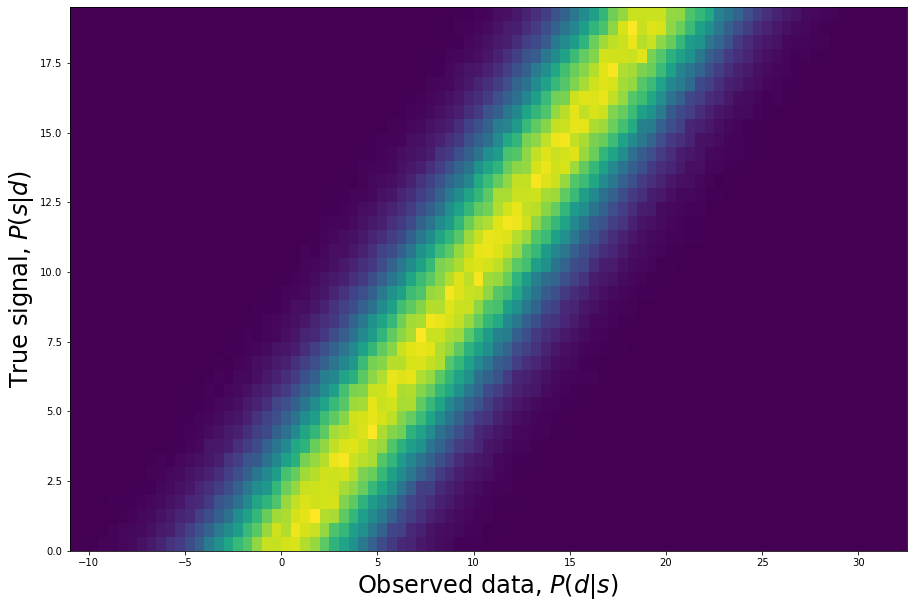

In [79]:
size = 1000000
bkgd = stats.norm.rvs(loc = 0, scale = 3, size = size)
signal = stats.uniform.rvs(loc = 0, scale = 20, size = size)

data = bkgd + signal

signaledges = np.arange(0, 20, 0.5)
dataedges = np.arange(int(min(data)), int(max(data)), 0.5)
#print(signaledges, dataedges)
p0, xedges0, yedges0, img = plt.hist2d(data,signal, bins=[dataedges,signaledges], density=True)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

plt.show()

# Problem 1b

Looking at true signal of 10.00, I plot the observed signal. This plot shows the distribution of possible observed signals if the injected signal was at 10.00. So it has a range from of possible observed signals of around -2 to 22. The observed signal is background signal + true signal.

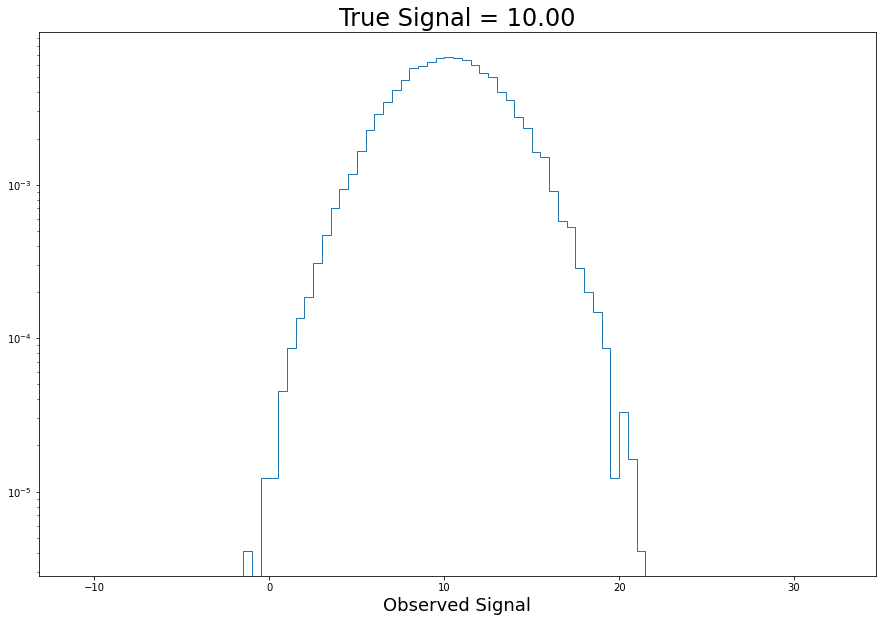

In [81]:
index = np.where(yedges0 == 10)[0]
#print(index)
#print(len(p0.T[index][0]))
plt.stairs(p0.T[index][0], xedges0)
plt.semilogy()
plt.xlabel('Observed Signal', fontsize = 18)
plt.title('True Signal = 10.00', fontsize = 24)
plt.show()

# Problem 1c

Picking the observed value of 10.00, the range of possible true signals it could be is form around 0.00 to 19.00. The true signal is observed signal - background signal.

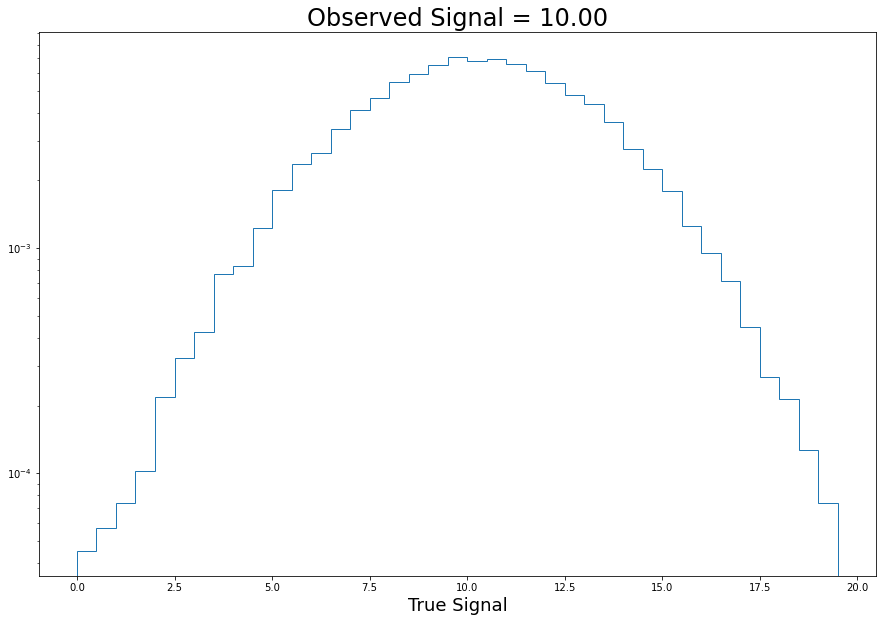

In [82]:
index = np.where(xedges0 == 10)

plt.stairs(p0[index][0], yedges0)
plt.semilogy()
plt.title('Observed Signal = 10.00', fontsize = 24)
plt.xlabel('True Signal', fontsize = 18)
plt.show()

# Problem 2

Picking a mean of 12 for a Gaussian distribution with $\sigma = 3$ , I plotted the 2D histogram.

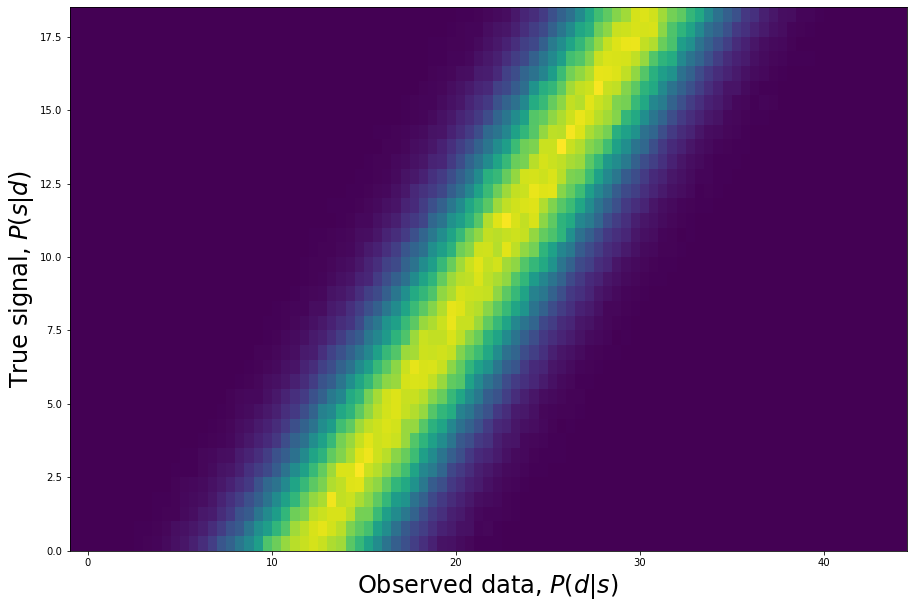

In [83]:
size = 1000000
bkgd = stats.norm.rvs(loc = 12, scale = 3, size = size)
signal = stats.uniform.rvs(loc = 0, scale = 20, size = size)

data = bkgd + signal

signaledges = np.arange(int(min(signal)), int(max(signal)), 0.5)
dataedges = np.arange(int(min(data)), int(max(data)), 0.5)
#print(signaledges, dataedges)

p12, xedges12, yedges12, img = plt.hist2d(data,signal, bins=[dataedges,signaledges], density=True)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

plt.show()

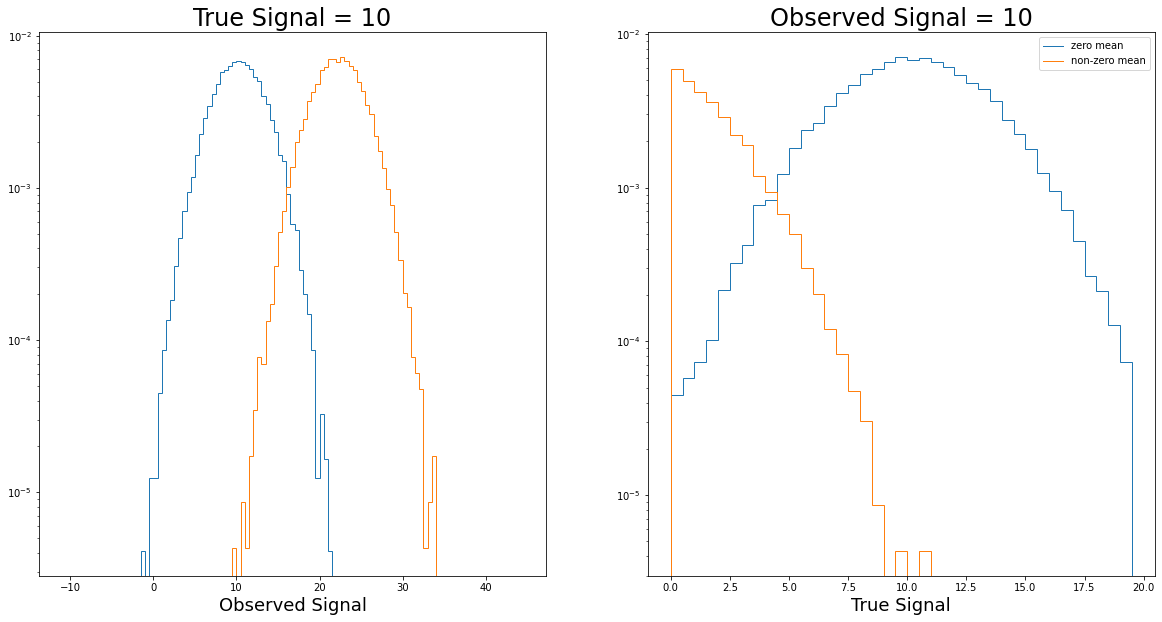

In [86]:
fig, ax = plt.subplots(1,2, figsize = (20,10))

edges = [[yedges0, xedges0],[yedges12, xedges12]]
xlabels = ['Observed Signal', 'True Signal']
titles = ['True Signal = 10', 'Observed Signal = 10']
for i in range(2):
    index = np.where(edges[0][i] == 10)[0]
    #print(index)
    #print(len(p.T[index][0]))
    if i == 0:
        ax[i].stairs(p0.T[index][0], xedges0, label = 'zero mean')
    else:
        ax[i].stairs(p0[index][0], yedges0, label = 'zero mean')
    index = np.where(edges[1][i] == 10)[0]
    #print(index)
    #print(len(p.T[index][0]))
    if i == 0:
        ax[i].stairs(p12.T[index][0], xedges12, label = 'non-zero mean')
    else:
        ax[i].stairs(p12[index][0], yedges12, label = 'non-zero mean')
    ax[i].semilogy()
    ax[i].set_xlabel(xlabels[i], fontsize = 18)
    ax[i].set_title(titles[i], fontsize = 24)
plt.legend()
plt.show()

They aren't centered on the same value because the background mean is different. Since $\text{observed signal} = \text{true signal} + \text{background signal}$, if the mean of the background signal is higher, the mean of the observed signal will also be higher. $\text{true signal} = \text{observed signal} -\text{background signal}$ so a higher background signal would imply a lower true signal.